# NCAA March Madness Prediction Model

This script builds a prediction model for the March Madness tournament, analyzing historical NCAA basketball data for both men's and women's teams. I'm using a point spread approach (basically how many points one team is expected to win or lose by) as the foundation, then converting those spreads to win probabilities for my Kaggle competition submission.

The basic idea: I aggregate team season stats and strength of schedule metrics, then train an XGBoost model to predict the expected point differential between any two teams. This gives me a solid prediction of which team would win in a hypothetical matchup - exactly what I need for the competition!

[kaggle competitions march-machine-learning-mania-2025](https://www.kaggle.com/competitions/march-machine-learning-mania-2025)

[github bedwards mania](https://github.com/bedwards/mania)

```
NCAA D1 basketball 2010-2025 men's and women's
Predicted point spread distribution
13128.00  ┼
11934.64  ┤                      ╭─╮
10741.27  ┤                     ╭╯ │
 9547.91  ┤                    ╭╯  ╰╮
 8354.55  ┤                    │    ╰╮
 7161.18  ┤                   ╭╯     │
 5967.82  ┤                  ╭╯      ╰╮
 4774.45  ┤                  │        ╰╮
 3581.09  ┤                 ╭╯         │
 2387.73  ┤               ╭─╯          ╰─╮
 1194.36  ┤            ╭──╯              ╰──╮
    1.00  ┼────────────╯                    ╰───────────────
                                 0          32

NCAA D1 basketball 2010-2025 men's and women's
Predicted win probabilities distribution
13440.00  ┤
12332.18  ┼╮
11224.36  ┤│                                               ╭
10116.55  ┤│                                               │
 9008.73  ┤│                                               │
 7900.91  ┤│                                               │
 6793.09  ┤│                                               │
 5685.27  ┤│                                               │
 4577.45  ┤╰╮                                             ╭╯
 3469.64  ┤ ╰╮                                          ╭─╯
 2361.82  ┤  ╰──────╮                              ╭────╯
 1254.00  ┤         ╰──────────────────────────────╯
```

Brier score: 0.1479

#### Top 25 Women's and Men's based on my model

- Tourney Win: Probability of winning the NCAA tournament (estimated by winning 6 consecutive games). Higher values indicate stronger championship contenders.
- PPG: Points Per Game scored by the team. Measures raw offensive output without accounting for pace.
- Wtd Diff: Weighted Point Differential - the average margin of victory adjusted for strength of schedule. Positive numbers indicate winning teams; higher values represent more dominant teams.
- SOS: Strength of Schedule - average offensive rating of opponents faced. Higher numbers indicate a more difficult schedule.
- Off Eff: Offensive Efficiency - points scored per 100 possessions. This pace-adjusted metric better reflects offensive quality than raw points per game.
- Ast/TO: Assist to Turnover Ratio - measures a team's ball control and passing efficiency. Values above 1.0 indicate more assists than turnovers; elite teams often exceed 1.5.

```
Top 25 Women's Teams (2025)
Rank Team               Tourney Win  PPG    Wtd Diff  SOS    Off Eff  Ast/TO
----------------------------------------------------------------------------
1    Connecticut           1.57%     80.9    +29.5    67.2    115.5   2.04
2    Texas                 1.57%     82.7    +28.9    72.4    111.9   1.32
3    Notre Dame            1.56%     86.7    +28.5    70.5    111.5   1.20
4    USC                   1.55%     82.1    +27.0    70.2    107.3   1.24
5    South Carolina        1.54%     80.2    +26.0    73.8    110.0   1.37
6    UCLA                  1.54%     79.6    +25.8    71.1    109.0   1.37
7    Kansas St             1.54%     80.4    +25.4    67.8    112.1   1.82
8    LSU                   1.53%     86.3    +24.8    72.5    109.0   1.03
9    West Virginia         1.53%     77.1    +24.4    67.8    104.2   0.90
10   TCU                   1.50%     79.2    +23.0    67.8    114.3   1.76
11   Mississippi           1.50%     76.4    +22.7    70.4    105.6   1.34
12   Tennessee             1.49%     90.0    +22.5    73.3    110.0   1.12
13   Baylor                1.46%     80.0    +20.9    67.0    106.6   1.43
14   Michigan St           1.44%     81.0    +20.3    69.6    105.0   1.28
15   Alabama               1.44%     78.8    +20.3    71.1    107.7   1.12
16   Florida St            1.44%     90.8    +20.2    69.5    112.3   1.31
17   Oklahoma St           1.43%     78.0    +19.8    68.0    105.0   0.97
18   Ohio St               1.41%     80.0    +19.3    70.4    103.8   1.26
19   Vanderbilt            1.41%     84.7    +19.3    70.9    109.3   1.21
20   Fairfield             1.39%     74.2    +18.9    61.1    106.5   1.40
21   Oklahoma              1.38%     85.5    +18.6    71.4    103.3   1.14
22   Duke                  1.38%     75.4    +18.5    72.0    102.4   1.19
23   Harvard               1.37%     70.3    +18.4    61.8    102.3   1.05
24   North Carolina        1.34%     71.9    +17.6    70.6    100.4   1.21
25   Utah                  1.32%     77.8    +17.3    69.9    107.6   1.24

Top 25 Men's Teams (2025)
Rank Team               Tourney Win  PPG    Wtd Diff  SOS    Off Eff  Ast/TO
----------------------------------------------------------------------------
1    Duke                  2.21%     81.0    +20.7    74.6    122.9   1.81
2    Gonzaga               2.09%     88.0    +18.4    73.4    121.1   2.15
3    Houston               2.08%     75.4    +18.2    74.3    117.1   1.55
4    Florida               2.06%     83.8    +17.9    74.9    118.7   1.52
5    Auburn                2.04%     85.1    +17.7    77.0    122.4   1.93
6    Maryland              1.97%     83.5    +16.7    74.2    117.0   1.50
7    Tennessee             1.81%     74.6    +15.0    77.4    114.0   1.59
8    Texas Tech            1.80%     81.8    +14.8    73.7    119.1   1.68
9    Iowa St               1.78%     81.3    +14.7    74.1    115.3   1.36
10   Missouri              1.70%     82.6    +14.0    74.6    119.4   1.34
11   VCU                   1.68%     77.4    +13.8    72.1    113.9   1.39
12   St Mary's CA          1.66%     74.5    +13.6    75.1    115.1   1.77
13   UC San Diego          1.64%     78.0    +13.5    71.7    115.0   1.62
14   St John's             1.54%     78.2    +12.7    73.4    107.0   1.48
15   Michigan St           1.46%     79.1    +12.1    75.4    113.8   1.58
16   Alabama               1.43%     90.3    +11.9    77.6    118.4   1.34
17   Arizona               1.43%     81.0    +11.9    74.8    112.5   1.45
18   Wisconsin             1.42%     82.0    +11.9    75.9    118.3   1.61
19   Illinois              1.42%     83.9    +11.8    75.0    114.0   1.26
20   Yale                  1.40%     82.2    +11.7    72.9    117.0   1.59
21   BYU                   1.38%     80.2    +11.6    72.4    116.1   1.52
22   Clemson               1.35%     77.4    +11.4    74.9    115.1   1.42
23   Michigan              1.28%     81.6    +10.9    75.1    112.8   1.18
24   SMU                   1.26%     82.1    +10.8    73.1    115.8   1.46
25   Louisville            1.26%     79.5    +10.8    74.5    114.0   1.35
```

In [1]:
try:
    get_ipython().run_line_magic("reset", "-f")
except NameError:
    is_notebook = False
    p = print
else:
    is_notebook = True
    p = display
    # p = print

import warnings

warnings.simplefilter("ignore")

from math import floor
import numpy as np
import pandas as pd

if is_notebook:
    import matplotlib.pyplot as plt
    import seaborn as sns
else:
    import asciichartpy

import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import brier_score_loss
from scipy.stats import norm
from scipy.optimize import minimize

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

input_dir = "march-machine-learning-mania-2025"

## Data Loading and Setup

First, I'm setting up the environment and importing the libraries I'll need. I'm loading several data files containing game results for both men's and women's basketball - regular season games, NCAA tournament games, and secondary tournament games (like the NIT). For each type, I'm grabbing both "compact" results (basic game outcome data) and "detailed" results (containing all the box score stats like rebounds, assists, etc.).

I'm starting from the 2010 season since that's when the detailed women's data begins. This way I can build a unified model for both men's and women's basketball, which I think will give me better overall predictions than separate models.

In [2]:
df_names = []
df_names_compact = []
df_names_detailed = []

for gender in ["M", "W"]:
    for part in ["RegularSeason", "NCAATourney", "SecondaryTourney"]:
        for result_type in ["Compact", "Detailed"]:
            if part == "SecondaryTourney" and result_type == "Detailed":
                continue
            df_name = f"{gender}{part}{result_type}Results"
            df_names.append(df_name)
            if result_type == "Compact":
                df_names_compact.append(df_name)
            else:
                df_names_detailed.append(df_name)
            print(df_name)
            path = f"../input/{input_dir}/{df_name}.csv"
            df = pd.read_csv(path)
            df["Part"] = part
            globals()[df_name] = df

season_min = WRegularSeasonDetailedResults["Season"].min()

for df_name in df_names:
    df = globals()[df_name]
    globals()[df_name] = df[df["Season"] >= season_min]

MRegularSeasonCompactResults
MRegularSeasonDetailedResults
MNCAATourneyCompactResults
MNCAATourneyDetailedResults
MSecondaryTourneyCompactResults
WRegularSeasonCompactResults
WRegularSeasonDetailedResults
WNCAATourneyCompactResults
WNCAATourneyDetailedResults
WSecondaryTourneyCompactResults


## Data Reshaping and Team Statistics

I've now consolidated all the detailed game data and I'm reshaping it to be more machine-learning friendly. For each game, I'm creating a consistent format where the teams are labeled as "team_1" and "team_2" (instead of winner/loser), with stats labeled accordingly. I'm also calculating the point spread between the teams - the key value I want to predict.

I then convert this further into "offensive" and "defensive" perspectives for each team in each game. This gives me a complete picture of how teams perform both when they have the ball and when they're defending. I'll use this to aggregate season-level statistics for each team.

In [3]:
game_stats_1_2 = pd.DataFrame()

for df_name in df_names_detailed:
    game_stats_1_2 = pd.concat([game_stats_1_2, globals()[df_name]])

game_stats_1_2 = game_stats_1_2.reset_index(drop=True)
mask = game_stats_1_2["WTeamID"] < game_stats_1_2["LTeamID"]


def to_1_2(col_W_L):
    game_stats_1_2.loc[mask, f"{col_W_L}_1"] = game_stats_1_2[f"W{col_W_L}"]
    game_stats_1_2.loc[mask, f"{col_W_L}_2"] = game_stats_1_2[f"L{col_W_L}"]
    game_stats_1_2.loc[~mask, f"{col_W_L}_1"] = game_stats_1_2[f"L{col_W_L}"]
    game_stats_1_2.loc[~mask, f"{col_W_L}_2"] = game_stats_1_2[f"W{col_W_L}"]
    game_stats_1_2[f"{col_W_L}_1"] = game_stats_1_2[f"{col_W_L}_1"].astype(
        game_stats_1_2[f"W{col_W_L}"].dtype
    )
    game_stats_1_2[f"{col_W_L}_2"] = game_stats_1_2[f"{col_W_L}_2"].astype(
        game_stats_1_2[f"W{col_W_L}"].dtype
    )


game_stats_1_2["WLoc"] = game_stats_1_2["WLoc"].astype("category")
game_stats_1_2["LLoc"] = game_stats_1_2["WLoc"].cat.rename_categories(
    {"A": "H", "H": "A"}
)

for c in game_stats_1_2.columns:
    if c.startswith("W"):
        to_1_2(c[1:])

game_stats_1_2["Spread_1"] = game_stats_1_2["Score_1"] - game_stats_1_2["Score_2"]
game_stats_1_2["Spread_2"] = game_stats_1_2["Score_2"] - game_stats_1_2["Score_1"]
game_stats_1_2 = game_stats_1_2[[c for c in game_stats_1_2 if c[0] not in ("W", "L")]]
game_stats_1_2 = game_stats_1_2.drop(columns="NumOT")
game_stats_1_2.insert(2, "TeamID_1", game_stats_1_2.pop("TeamID_1"))
game_stats_1_2.insert(3, "TeamID_2", game_stats_1_2.pop("TeamID_2"))
game_stats_1_2 = game_stats_1_2.sort_values(
    ["Season", "DayNum", "TeamID_1", "TeamID_2"]
)
game_stats_1_2 = game_stats_1_2.reset_index(drop=True)
print(f"game_stats_1_2     {game_stats_1_2.shape[0]:,}")
p(game_stats_1_2)
print()

print(f"MRegularSeasonDetai{MRegularSeasonDetailedResults.shape[0]:>7,}")
print(f"WRegularSeasonDetai{WRegularSeasonDetailedResults.shape[0]:>7,}")
print(
    f"RegularSeasonDetail{MRegularSeasonDetailedResults.shape[0]+WRegularSeasonDetailedResults.shape[0]:>7,}"
)

reg_season = game_stats_1_2[game_stats_1_2["Part"] == "RegularSeason"]
print(f"reg_season         {reg_season.shape[0]:,}")

game_stats_1_o = reg_season.rename(
    columns={c: f"{c[:-2]}_o" for c in reg_season if c[-2:] == "_1"}
)
game_stats_1_o = game_stats_1_o.rename(
    columns={c: f"{c[:-2]}_d" for c in game_stats_1_o if c[-2:] == "_2"}
)
print(f"game_stats_1_o     {game_stats_1_o.shape[0]:,}")

game_stats_2_o = reg_season.rename(
    columns={c: f"{c[:-2]}_o" for c in reg_season if c[-2:] == "_2"}
)
game_stats_2_o = game_stats_2_o.rename(
    columns={c: f"{c[:-2]}_d" for c in game_stats_2_o if c[-2:] == "_1"}
)
print(f"game_stats_2_o     {game_stats_2_o.shape[0]:,}")
print(f"game_stats_1_o+2_o {game_stats_1_o.shape[0]+game_stats_2_o.shape[0]:,}\n")

game_stats_o_d = pd.concat([game_stats_1_o, game_stats_2_o])
game_stats_o_d = game_stats_o_d.drop(columns="Part")
game_stats_o_d.insert(2, "TeamID_o", game_stats_o_d.pop("TeamID_o"))
game_stats_o_d.insert(3, "TeamID_d", game_stats_o_d.pop("TeamID_d"))
game_stats_o_d = game_stats_o_d.sort_values(
    ["Season", "DayNum", "TeamID_o", "TeamID_d"]
)
game_stats_o_d = game_stats_o_d.reset_index(drop=True)
print(f"game_stats_o_d     {game_stats_o_d.shape[0]:,}")
p(game_stats_o_d)
print()

game_stats_1_2     166,128


,Season,DayNum,TeamID_1,TeamID_2,Part,Score_1,Score_2,FGM_1,FGM_2,FGA_1,FGA_2,FGM3_1,FGM3_2,FGA3_1,FGA3_2,FTM_1,FTM_2,FTA_1,FTA_2,OR_1,OR_2,DR_1,DR_2,Ast_1,Ast_2,TO_1,TO_2,Stl_1,Stl_2,Blk_1,Blk_2,PF_1,PF_2,Spread_1,Spread_2
0,2010,7,1107,1393,RegularSeason,43,75,15,29,55,60,5,2,28,17,8,15,14,31,12,14,27,32,10,21,32,21,12,21,4,6,27,16,-32,32
1,2010,7,1108,1326,RegularSeason,60,100,21,39,61,73,7,14,17,33,11,8,20,12,11,13,24,34,7,29,13,6,4,8,5,6,16,19,-40,40
2,2010,7,1143,1293,RegularSeason,75,70,24,26,52,52,5,8,12,21,22,10,32,15,13,11,19,20,15,11,12,17,8,7,1,3,14,24,5,-5
3,2010,7,1198,1314,RegularSeason,72,88,25,34,68,61,8,4,23,13,14,16,17,19,13,12,16,32,15,23,20,26,14,10,2,8,18,19,-16,16
4,2010,9,1143,1178,RegularSeason,95,61,29,20,61,57,7,4,17,18,30,17,35,27,15,14,30,18,11,14,10,15,5,4,3,2,20,21,34,-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166123,2025,106,3150,3378,RegularSeason,52,70,18,25,58,59,5,4,17,17,11,16,14,18,7,8,24,30,5,15,15,12,8,9,2,3,15,16,-18,18
166124,2025,106,3194,3349,RegularSeason,39,72,10,30,55,63,3,10,17,24,16,2,23,4,4,5,25,39,5,21,10,10,4,6,3,5,9,14,-33,33
166125,2025,106,3242,3416,RegularSeason,63,58,17,23,46,63,4,7,17,26,25,5,28,11,5,15,26,21,9,11,12,12,4,4,5,2,16,21,5,-5
166126,2025,106,3329,3428,RegularSeason,68,64,23,25,63,58,6,5,23,23,16,9,18,16,18,8,25,18,9,16,17,11,6,8,3,6,21,20,4,-4



MRegularSeasonDetai 83,674
WRegularSeasonDetai 80,626
RegularSeasonDetail164,300
reg_season         164,300
game_stats_1_o     164,300
game_stats_2_o     164,300
game_stats_1_o+2_o 328,600

game_stats_o_d     328,600


,Season,DayNum,TeamID_o,TeamID_d,Score_o,Score_d,FGM_o,FGM_d,FGA_o,FGA_d,FGM3_o,FGM3_d,FGA3_o,FGA3_d,FTM_o,FTM_d,FTA_o,FTA_d,OR_o,OR_d,DR_o,DR_d,Ast_o,Ast_d,TO_o,TO_d,Stl_o,Stl_d,Blk_o,Blk_d,PF_o,PF_d,Spread_o,Spread_d
0,2010,7,1107,1393,43,75,15,29,55,60,5,2,28,17,8,15,14,31,12,14,27,32,10,21,32,21,12,21,4,6,27,16,-32,32
1,2010,7,1108,1326,60,100,21,39,61,73,7,14,17,33,11,8,20,12,11,13,24,34,7,29,13,6,4,8,5,6,16,19,-40,40
2,2010,7,1143,1293,75,70,24,26,52,52,5,8,12,21,22,10,32,15,13,11,19,20,15,11,12,17,8,7,1,3,14,24,5,-5
3,2010,7,1198,1314,72,88,25,34,68,61,8,4,23,13,14,16,17,19,13,12,16,32,15,23,20,26,14,10,2,8,18,19,-16,16
4,2010,7,1293,1143,70,75,26,24,52,52,8,5,21,12,10,22,15,32,11,13,20,19,11,15,17,12,7,8,3,1,24,14,-5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328595,2025,106,3398,3404,52,73,20,24,60,57,3,5,19,14,9,20,15,28,12,13,22,24,8,15,20,19,12,10,2,6,20,13,-21,21
328596,2025,106,3404,3398,73,52,24,20,57,60,5,3,14,19,20,9,28,15,13,12,24,22,15,8,19,20,10,12,6,2,13,20,21,-21
328597,2025,106,3416,3242,58,63,23,17,63,46,7,4,26,17,5,25,11,28,15,5,21,26,11,9,12,12,4,4,2,5,21,16,-5,5
328598,2025,106,3428,3329,64,68,25,23,58,63,5,6,23,23,9,16,16,18,8,18,18,25,16,9,11,17,8,6,6,3,20,21,-4,4


## Team Performance Analysis

Looking at how many games each team plays in a season, we can see there's quite a bit of variation. Most teams play around 27-33 games per season, but there are some outliers with very few games. 

For example, in the 2021 COVID season, there were 16 teams that played 10 or fewer games. These anomalies might affect our model's ability to accurately assess those teams, but since they're relatively rare and mostly from a single unusual season, I'm going to keep them in the dataset.

In [4]:
# Look at the distribution of games per team
games_per_team = game_stats_o_d.rename(columns={"TeamID_o": "TeamID"}).drop(
    columns="TeamID_d"
)
games_per_team_count = games_per_team.groupby(["Season", "TeamID"]).size()

# Count how many team-seasons have each number of games
games_count_distribution = games_per_team_count.value_counts().sort_index()
print("Distribution of games per team-season:")
print(games_count_distribution)

# Look at specific examples of teams with very few games
teams_with_few_games = games_per_team_count[games_per_team_count <= 10].reset_index()
print("\nSample of teams with 10 or fewer games:")
print(teams_with_few_games.head(10))

# Check if there's a pattern by season
few_games_by_season = teams_with_few_games.groupby("Season").size()
print("\nNumber of teams with few games by season:")
print(few_games_by_season)

Distribution of games per team-season:
2        1
4        3
5        2
6        2
8        2
9        3
10       3
11       2
12       3
13       7
14      12
15      25
16      17
17      20
18      44
19      47
20      73
21      92
22     138
23     179
24     264
25     335
26     425
27     591
28     977
29    1498
30    2076
31    1971
32    1427
33     702
34     272
35      26
36       2
Name: count, dtype: int64

Sample of teams with 10 or fewer games:
   Season  TeamID   0
0    2021    1110  10
1    2021    1152   9
2    2021    1224   4
3    2021    1263   9
4    2021    3137  10
5    2021    3145   5
6    2021    3159   9
7    2021    3181   4
8    2021    3354  10
9    2021    3363   4

Number of teams with few games by season:
Season
2021    16
dtype: int64


## Calculating Season Statistics

Now I'm calculating season-average statistics for each team by grouping all their games. For each team and season, I compute their average offensive and defensive performance across all the metrics I have: points scored/allowed, field goals, three-pointers, free throws, rebounds, assists, turnovers, steals, blocks, and fouls.

These season averages form the foundation of my predictive features. I want to know how teams typically perform to predict how they'll do in tournament matchups.

In [5]:
# p(game_stats_o_d)
season_stats = game_stats_o_d.rename(columns={"TeamID_o": "TeamID"})
season_stats = season_stats.drop(columns="TeamID_d")
season_stats_g = season_stats.groupby(["Season", "TeamID"])

season_stats = season_stats_g[
    [c for c in season_stats if c.endswith("_o")]
    + [c for c in season_stats if c.endswith("_d")]
].mean()

season_stats = season_stats.reset_index()
season_stats = season_stats.sort_values(["Season", "TeamID"])
season_stats = season_stats.reset_index(drop=True)

print(f"season_stats   {season_stats.shape[0]:,}")
p(season_stats)
print()

season_stats   11,241


,Season,TeamID,Score_o,FGM_o,FGA_o,FGM3_o,FGA3_o,FTM_o,FTA_o,OR_o,DR_o,Ast_o,TO_o,Stl_o,Blk_o,PF_o,Spread_o,Score_d,FGM_d,FGA_d,FGM3_d,FGA3_d,FTM_d,FTA_d,OR_d,DR_d,Ast_d,TO_d,Stl_d,Blk_d,PF_d,Spread_d
0,2010,1102,55.620690,20.000000,45.586207,5.620690,18.103448,10.000000,15.689655,6.758621,19.862069,12.275862,12.793103,4.827586,1.517241,17.551724,-7.344828,62.965517,21.448276,47.103448,7.206897,20.827586,12.862069,18.827586,8.862069,22.206897,13.000000,11.655172,5.931034,2.931034,16.034483,7.344828
1,2010,1103,71.030303,25.090909,57.636364,6.606061,19.515152,14.242424,21.393939,13.454545,22.696970,13.515152,13.666667,6.242424,3.181818,19.878788,4.575758,66.454545,22.787879,53.787879,4.969697,15.272727,15.909091,22.545455,11.424242,22.242424,10.848485,14.333333,7.060606,2.606061,19.333333,-4.575758
2,2010,1104,68.500000,24.718750,56.062500,5.468750,15.625000,13.593750,19.218750,12.062500,23.125000,13.406250,12.812500,7.781250,3.968750,18.218750,3.718750,64.781250,23.000000,54.187500,5.656250,17.812500,13.125000,19.781250,12.000000,22.437500,11.187500,13.937500,5.812500,4.093750,16.656250,-3.718750
3,2010,1105,63.826087,21.173913,57.173913,3.826087,13.565217,17.652174,27.521739,13.956522,21.608696,9.695652,15.913043,9.391304,5.217391,20.652174,-6.478261,70.304348,24.826087,56.913043,5.130435,16.347826,15.521739,24.521739,15.260870,27.173913,14.304348,18.826087,8.086957,5.304348,20.826087,6.478261
4,2010,1106,64.035714,21.214286,53.500000,5.928571,19.071429,15.678571,24.250000,13.357143,22.321429,12.642857,16.214286,7.464286,4.178571,20.821429,-2.392857,66.428571,22.357143,50.857143,5.000000,14.035714,16.714286,24.857143,10.250000,23.607143,11.392857,15.964286,7.857143,3.571429,21.321429,2.392857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11236,2025,3476,63.608696,23.913043,58.608696,7.043478,21.304348,8.739130,10.956522,9.043478,23.695652,16.391304,16.391304,4.565217,2.695652,14.869565,-4.260870,67.869565,25.565217,59.956522,6.652174,20.000000,10.086957,14.347826,8.956522,22.000000,13.000000,13.260870,9.521739,3.304348,15.478261,4.260870
11237,2025,3477,61.954545,22.818182,60.681818,6.772727,21.409091,9.545455,13.045455,7.318182,22.590909,12.954545,15.181818,6.363636,3.045455,17.227273,-10.818182,72.772727,27.454545,62.954545,6.045455,19.000000,11.818182,17.818182,10.954545,27.590909,14.454545,13.818182,7.863636,3.045455,13.681818,10.818182
11238,2025,3478,52.250000,17.416667,50.875000,6.333333,20.916667,11.083333,14.666667,6.875000,21.958333,9.916667,17.208333,4.958333,1.750000,14.500000,-19.250000,71.500000,26.916667,60.833333,8.541667,24.541667,9.125000,12.333333,9.541667,24.083333,17.541667,11.791667,8.500000,2.333333,16.000000,19.250000
11239,2025,3479,62.380952,21.476190,52.904762,6.714286,21.000000,12.714286,17.428571,5.095238,22.904762,10.238095,17.714286,5.619048,1.380952,18.476190,-7.380952,69.761905,26.285714,59.571429,4.904762,16.761905,12.285714,18.000000,8.714286,24.428571,12.476190,15.095238,8.904762,2.619048,19.095238,7.380952


## Validating Season Stats

Just sanity-checking the season stats for a specific team (TeamID 1393 in the 2010 season) to make sure everything looks reasonable. Eyeballing the data is always a good practice to catch any obvious issues before building models.

In [6]:
p(season_stats[(season_stats["Season"] == 2010) & (season_stats["TeamID"] == 1393)])
# p(game_stats_o_d[(game_stats_o_d["Season"]==2010) & (game_stats_o_d["TeamID_o"]==1393)])
# p(MRegularSeasonDetailedResults[(MRegularSeasonDetailedResults["Season"]==2010) & (MRegularSeasonDetailedResults["WTeamID"]==1393)])
# p(MRegularSeasonDetailedResults[(MRegularSeasonDetailedResults["Season"]==2010) & (MRegularSeasonDetailedResults["LTeamID"]==1393)])

,Season,TeamID,Score_o,FGM_o,FGA_o,FGM3_o,FGA3_o,FTM_o,FTA_o,OR_o,DR_o,Ast_o,TO_o,Stl_o,Blk_o,PF_o,Spread_o,Score_d,FGM_d,FGA_d,FGM3_d,FGA3_d,FTM_d,FTA_d,OR_d,DR_d,Ast_d,TO_d,Stl_d,Blk_d,PF_d,Spread_d
277,2010,1393,81.46875,30.0625,58.28125,6.71875,17.4375,14.625,21.78125,12.125,26.03125,19.375,15.09375,10.0,6.5625,14.625,14.59375,66.875,24.59375,61.65625,7.71875,24.90625,9.96875,15.625,14.0,20.5,15.84375,16.25,8.34375,2.3125,18.25,-14.59375


## Calculating Strength of Schedule

Raw team statistics aren't enough - a team that puts up great numbers against weak competition isn't necessarily better than a team with decent numbers against tough opponents. So I'm creating strength of schedule metrics.

For each team, I'm looking at all their opponents and averaging those opponents' season stats. This gives me a picture of the quality of competition each team has faced, which should help me make better predictions when teams from different conferences meet in the tournament.

In [7]:
matchups = game_stats_o_d[["Season", "DayNum", "TeamID_o", "TeamID_d"]]
p(matchups)

# matchups with the season stats of d
opp_season_stats = pd.merge(
    matchups,
    season_stats,
    left_on=["Season", "TeamID_d"],
    right_on=["Season", "TeamID"],
)
opp_season_stats = opp_season_stats.drop(columns="TeamID")
opp_season_stats = opp_season_stats.sort_values(
    ["Season", "DayNum", "TeamID_o", "TeamID_d"]
)
opp_season_stats = opp_season_stats.reset_index(drop=True)
p(opp_season_stats)

# strength of schedule
sos_stats = opp_season_stats.rename(columns={"TeamID_o": "TeamID"})
sos_stats = sos_stats.drop(columns="TeamID_d")
sos_stats_g = sos_stats.groupby(["Season", "TeamID"])

sos_stats = sos_stats_g[
    [c for c in sos_stats if c.endswith("_o")]
    + [c for c in sos_stats if c.endswith("_d")]
].mean()

sos_stats = sos_stats.reset_index()
sos_stats = sos_stats.sort_values(["Season", "TeamID"])
sos_stats = sos_stats.reset_index(drop=True)

print(f"sos_stats   {sos_stats.shape[0]:,}")
p(sos_stats)
print()

,Season,DayNum,TeamID_o,TeamID_d
0,2010,7,1107,1393
1,2010,7,1108,1326
2,2010,7,1143,1293
3,2010,7,1198,1314
4,2010,7,1293,1143
...,...,...,...,...
328595,2025,106,3398,3404
328596,2025,106,3404,3398
328597,2025,106,3416,3242
328598,2025,106,3428,3329


,Season,DayNum,TeamID_o,TeamID_d,Score_o,FGM_o,FGA_o,FGM3_o,FGA3_o,FTM_o,FTA_o,OR_o,DR_o,Ast_o,TO_o,Stl_o,Blk_o,PF_o,Spread_o,Score_d,FGM_d,FGA_d,FGM3_d,FGA3_d,FTM_d,FTA_d,OR_d,DR_d,Ast_d,TO_d,Stl_d,Blk_d,PF_d,Spread_d
0,2010,7,1107,1393,81.468750,30.062500,58.281250,6.718750,17.437500,14.625000,21.781250,12.125000,26.031250,19.375000,15.093750,10.000000,6.562500,14.625000,14.593750,66.875000,24.593750,61.656250,7.718750,24.906250,9.968750,15.625000,14.000000,20.500000,15.843750,16.250000,8.343750,2.312500,18.250000,-14.593750
1,2010,7,1108,1326,74.235294,26.823529,54.058824,7.323529,18.882353,13.264706,19.294118,9.088235,24.382353,14.705882,11.323529,7.147059,4.088235,15.294118,13.029412,61.205882,22.117647,53.852941,6.794118,19.794118,10.176471,14.411765,9.676471,21.647059,12.382353,14.205882,5.147059,2.058824,18.029412,-13.029412
2,2010,7,1143,1293,76.093750,26.781250,53.937500,6.281250,16.906250,16.250000,23.125000,12.000000,24.250000,15.187500,14.500000,9.281250,5.406250,17.468750,15.062500,61.031250,21.281250,54.750000,5.468750,16.093750,13.000000,18.593750,12.125000,18.718750,10.875000,16.531250,6.468750,2.843750,18.750000,-15.062500
3,2010,7,1198,1314,75.187500,27.343750,61.687500,4.750000,14.156250,15.750000,23.968750,15.125000,26.843750,15.625000,15.406250,6.812500,5.812500,15.031250,2.875000,72.312500,27.031250,65.281250,7.343750,21.468750,10.906250,15.625000,13.312500,23.093750,14.343750,13.812500,8.718750,4.625000,19.718750,-2.875000
4,2010,7,1293,1143,77.969697,27.909091,58.454545,6.575758,17.636364,15.575758,20.575758,11.484848,24.272727,14.454545,12.000000,5.666667,2.484848,17.000000,9.575758,68.393939,24.636364,56.848485,5.666667,17.636364,13.454545,19.303030,10.757576,21.121212,12.454545,12.939394,5.454545,3.818182,17.393939,-9.575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328595,2025,106,3398,3404,66.037037,22.888889,55.370370,5.555556,17.962963,14.703704,19.555556,6.777778,21.555556,11.629630,15.259259,9.481481,3.222222,19.185185,-2.037037,68.074074,24.111111,57.222222,6.333333,21.074074,13.518519,19.074074,9.925926,23.592593,14.481481,17.481481,8.074074,3.370370,17.592593,2.037037
328596,2025,106,3404,3398,63.500000,23.153846,61.038462,5.076923,20.192308,12.115385,20.115385,10.846154,21.576923,9.576923,17.461538,10.230769,3.384615,21.384615,-9.192308,72.692308,24.576923,58.615385,6.192308,19.615385,17.346154,23.153846,10.769231,25.346154,13.692308,17.576923,8.461538,3.269231,18.192308,9.192308
328597,2025,106,3416,3242,66.769231,22.576923,52.923077,6.615385,18.807692,15.000000,20.038462,5.769231,22.961538,11.653846,13.807692,7.307692,2.538462,17.307692,0.115385,66.653846,24.115385,57.384615,7.346154,21.384615,11.076923,16.346154,8.461538,23.615385,14.269231,14.115385,6.423077,3.038462,19.538462,-0.115385
328598,2025,106,3428,3329,78.038462,28.538462,61.730769,8.307692,23.653846,12.653846,18.153846,10.115385,26.230769,14.307692,14.692308,8.461538,3.884615,16.807692,18.961538,59.076923,21.346154,58.846154,5.653846,21.076923,10.730769,15.153846,7.692308,20.576923,10.461538,16.000000,6.615385,3.307692,18.076923,-18.961538


sos_stats   11,241


,Season,TeamID,Score_o,FGM_o,FGA_o,FGM3_o,FGA3_o,FTM_o,FTA_o,OR_o,DR_o,Ast_o,TO_o,Stl_o,Blk_o,PF_o,Spread_o,Score_d,FGM_d,FGA_d,FGM3_d,FGA3_d,FTM_d,FTA_d,OR_d,DR_d,Ast_d,TO_d,Stl_d,Blk_d,PF_d,Spread_d
0,2010,1102,69.728744,24.011794,54.813255,6.365198,18.699247,15.339958,22.183968,10.716831,23.804088,12.927028,13.531883,6.968565,3.524106,19.020309,1.582561,68.146183,23.648457,54.457253,6.176110,18.302712,14.673159,21.410301,10.634559,23.694778,12.826721,14.203969,6.370927,3.107824,19.251339,-1.582561
1,2010,1103,67.267764,23.172504,54.588265,6.093471,18.283517,14.829285,21.396047,11.369141,23.177207,12.486628,13.511177,6.732949,3.088424,18.672267,-0.741711,68.009475,23.835595,54.754695,6.142610,17.971361,14.195675,20.586166,11.265551,23.599361,13.076027,13.693737,6.528018,3.442834,18.958736,0.741711
2,2010,1104,71.089466,24.983119,56.847579,6.827193,19.888131,14.296034,20.968929,11.983595,23.873458,12.984123,13.591532,6.884214,4.393907,18.114154,2.708900,68.380566,24.070280,56.721944,6.300129,18.488660,13.939876,20.273929,11.961125,23.244413,12.427304,13.922088,6.685336,3.528877,18.526866,-2.708900
3,2010,1105,64.159153,22.259241,55.049984,5.518976,17.669261,14.121695,22.025111,11.992140,23.362648,11.672212,16.242656,7.416848,3.621561,20.240283,-5.331436,69.490589,23.794831,54.755610,5.879062,17.410646,16.021865,24.318975,11.891378,24.918706,13.195224,15.421542,7.861066,3.765536,19.309235,5.331436
4,2010,1106,64.793014,22.427397,55.184119,5.311290,16.899909,14.626930,22.595692,11.772938,23.413570,11.712991,15.698645,7.384399,3.481578,20.377632,-4.926649,69.719663,23.917234,55.294905,5.868160,17.630628,16.017035,24.196605,12.241921,25.110506,13.432048,15.263942,7.592357,4.085299,19.401497,4.926649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11236,2025,3476,58.685519,21.585522,55.733493,5.894199,19.819027,9.620277,13.692521,8.279115,21.533751,11.755922,15.534375,6.718782,2.376629,15.947712,-6.891037,65.576556,24.284728,57.707438,6.209983,19.389308,10.797117,15.110109,9.363771,23.240916,13.780150,14.074236,7.729436,2.959840,15.180598,6.891037
11237,2025,3477,64.278432,23.346712,57.760945,5.772926,18.757441,11.812081,17.173239,9.078550,23.121889,12.697552,16.611047,8.436594,2.994523,17.469847,-0.406881,64.685313,23.454283,58.434448,5.900021,19.047686,11.876727,17.122906,9.602677,23.253368,13.165546,16.461574,8.614650,3.213631,17.770640,0.406881
11238,2025,3478,61.690407,22.657624,56.487326,5.597993,18.227937,10.777167,15.139101,8.462764,22.198576,12.261259,15.301993,6.854203,2.541041,16.495457,-3.484152,65.174559,24.011245,57.826578,6.315872,20.057537,10.836196,15.398817,9.209111,23.014729,13.107889,14.598082,7.664650,2.885840,16.079737,3.484152
11239,2025,3479,59.893001,21.787376,56.169487,5.875968,19.235234,10.442281,14.437512,8.598927,22.161803,12.363244,15.868087,6.427564,2.663853,16.404811,-6.171829,66.064830,24.336870,58.345985,6.446518,20.069977,10.944571,15.329724,9.313746,23.134467,13.927080,14.362768,7.948677,2.840598,15.911493,6.171829


## Combining Team Stats with Strength of Schedule

I'm merging the raw team stats with their strength of schedule metrics to create a comprehensive statistical profile for each team-season combination. These combined features will give my model a more complete picture of each team's true strength.

In [8]:
season_self_sos = pd.merge(
    season_stats, sos_stats, on=["Season", "TeamID"], suffixes=["_self", "_sos"]
)
print(f"season_self_sos {season_self_sos.shape[0]:,}")
p(season_self_sos)
print()

season_self_sos 11,241


,Season,TeamID,Score_o_self,FGM_o_self,FGA_o_self,FGM3_o_self,FGA3_o_self,FTM_o_self,FTA_o_self,OR_o_self,DR_o_self,Ast_o_self,TO_o_self,Stl_o_self,Blk_o_self,PF_o_self,Spread_o_self,Score_d_self,FGM_d_self,FGA_d_self,FGM3_d_self,FGA3_d_self,FTM_d_self,FTA_d_self,OR_d_self,DR_d_self,Ast_d_self,TO_d_self,Stl_d_self,Blk_d_self,PF_d_self,Spread_d_self,Score_o_sos,FGM_o_sos,FGA_o_sos,FGM3_o_sos,FGA3_o_sos,FTM_o_sos,FTA_o_sos,OR_o_sos,DR_o_sos,Ast_o_sos,TO_o_sos,Stl_o_sos,Blk_o_sos,PF_o_sos,Spread_o_sos,Score_d_sos,FGM_d_sos,FGA_d_sos,FGM3_d_sos,FGA3_d_sos,FTM_d_sos,FTA_d_sos,OR_d_sos,DR_d_sos,Ast_d_sos,TO_d_sos,Stl_d_sos,Blk_d_sos,PF_d_sos,Spread_d_sos
0,2010,1102,55.620690,20.000000,45.586207,5.620690,18.103448,10.000000,15.689655,6.758621,19.862069,12.275862,12.793103,4.827586,1.517241,17.551724,-7.344828,62.965517,21.448276,47.103448,7.206897,20.827586,12.862069,18.827586,8.862069,22.206897,13.000000,11.655172,5.931034,2.931034,16.034483,7.344828,69.728744,24.011794,54.813255,6.365198,18.699247,15.339958,22.183968,10.716831,23.804088,12.927028,13.531883,6.968565,3.524106,19.020309,1.582561,68.146183,23.648457,54.457253,6.176110,18.302712,14.673159,21.410301,10.634559,23.694778,12.826721,14.203969,6.370927,3.107824,19.251339,-1.582561
1,2010,1103,71.030303,25.090909,57.636364,6.606061,19.515152,14.242424,21.393939,13.454545,22.696970,13.515152,13.666667,6.242424,3.181818,19.878788,4.575758,66.454545,22.787879,53.787879,4.969697,15.272727,15.909091,22.545455,11.424242,22.242424,10.848485,14.333333,7.060606,2.606061,19.333333,-4.575758,67.267764,23.172504,54.588265,6.093471,18.283517,14.829285,21.396047,11.369141,23.177207,12.486628,13.511177,6.732949,3.088424,18.672267,-0.741711,68.009475,23.835595,54.754695,6.142610,17.971361,14.195675,20.586166,11.265551,23.599361,13.076027,13.693737,6.528018,3.442834,18.958736,0.741711
2,2010,1104,68.500000,24.718750,56.062500,5.468750,15.625000,13.593750,19.218750,12.062500,23.125000,13.406250,12.812500,7.781250,3.968750,18.218750,3.718750,64.781250,23.000000,54.187500,5.656250,17.812500,13.125000,19.781250,12.000000,22.437500,11.187500,13.937500,5.812500,4.093750,16.656250,-3.718750,71.089466,24.983119,56.847579,6.827193,19.888131,14.296034,20.968929,11.983595,23.873458,12.984123,13.591532,6.884214,4.393907,18.114154,2.708900,68.380566,24.070280,56.721944,6.300129,18.488660,13.939876,20.273929,11.961125,23.244413,12.427304,13.922088,6.685336,3.528877,18.526866,-2.708900
3,2010,1105,63.826087,21.173913,57.173913,3.826087,13.565217,17.652174,27.521739,13.956522,21.608696,9.695652,15.913043,9.391304,5.217391,20.652174,-6.478261,70.304348,24.826087,56.913043,5.130435,16.347826,15.521739,24.521739,15.260870,27.173913,14.304348,18.826087,8.086957,5.304348,20.826087,6.478261,64.159153,22.259241,55.049984,5.518976,17.669261,14.121695,22.025111,11.992140,23.362648,11.672212,16.242656,7.416848,3.621561,20.240283,-5.331436,69.490589,23.794831,54.755610,5.879062,17.410646,16.021865,24.318975,11.891378,24.918706,13.195224,15.421542,7.861066,3.765536,19.309235,5.331436
4,2010,1106,64.035714,21.214286,53.500000,5.928571,19.071429,15.678571,24.250000,13.357143,22.321429,12.642857,16.214286,7.464286,4.178571,20.821429,-2.392857,66.428571,22.357143,50.857143,5.000000,14.035714,16.714286,24.857143,10.250000,23.607143,11.392857,15.964286,7.857143,3.571429,21.321429,2.392857,64.793014,22.427397,55.184119,5.311290,16.899909,14.626930,22.595692,11.772938,23.413570,11.712991,15.698645,7.384399,3.481578,20.377632,-4.926649,69.719663,23.917234,55.294905,5.868160,17.630628,16.017035,24.196605,12.241921,25.110506,13.432048,15.263942,7.592357,4.085299,19.401497,4.926649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11236,2025,3476,63.608696,23.913043,58.608696,7.043478,21.304348,8.739130,10.956522,9.043478,23.695652,1

## Creating the Training Dataset

Now I'm building the actual training dataset for my model. For each possible matchup between teams in the same season, I'm combining both teams' season stats and strength of schedule metrics. I'm also adding the actual point spread from their games as the target variable.

The final training data has 119,167 rows (one for each possible matchup in my historical data) and a ton of features (120 columns) that describe various aspects of both teams' performance.

In [9]:
train = (
    game_stats_1_2.groupby(["Season", "TeamID_1", "TeamID_2"])["Spread_1"]
    .mean()
    .reset_index()
)

train = pd.merge(
    train,
    season_self_sos,
    left_on=["Season", "TeamID_1"],
    right_on=["Season", "TeamID"],
)
train = train.drop(columns="TeamID")

train = train.rename(columns={c: f"{c}_1" for c in train if c[-4:] in ("self", "_sos")})

train = pd.merge(
    train,
    season_self_sos,
    left_on=["Season", "TeamID_2"],
    right_on=["Season", "TeamID"],
)
train = train.drop(columns="TeamID")

train = train.rename(columns={c: f"{c}_2" for c in train if c[-4:] in ("self", "_sos")})

train = train.drop(columns=[c for c in train if c.startswith("Spread_d_")])

train = train.sort_values(["Season", "TeamID_1", "TeamID_2"])
train = train.reset_index(drop=True)

print(f"train        {train.shape[0]:,}")
p(train)
print()

X = train.drop(columns=["Season", "TeamID_1", "TeamID_2", "Spread_1"])

print(f"X        {X.shape[0]:,}")
p(X)
print()

y = train["Spread_1"].rename("y")

print(f"y        {y.shape[0]:,}")
p(y)
print()

train        119,167


,Season,TeamID_1,TeamID_2,Spread_1,Score_o_self_1,FGM_o_self_1,FGA_o_self_1,FGM3_o_self_1,FGA3_o_self_1,FTM_o_self_1,FTA_o_self_1,OR_o_self_1,DR_o_self_1,Ast_o_self_1,TO_o_self_1,Stl_o_self_1,Blk_o_self_1,PF_o_self_1,Spread_o_self_1,Score_d_self_1,FGM_d_self_1,FGA_d_self_1,FGM3_d_self_1,FGA3_d_self_1,FTM_d_self_1,FTA_d_self_1,OR_d_self_1,DR_d_self_1,Ast_d_self_1,TO_d_self_1,Stl_d_self_1,Blk_d_self_1,PF_d_self_1,Score_o_sos_1,FGM_o_sos_1,FGA_o_sos_1,FGM3_o_sos_1,FGA3_o_sos_1,FTM_o_sos_1,FTA_o_sos_1,OR_o_sos_1,DR_o_sos_1,Ast_o_sos_1,TO_o_sos_1,Stl_o_sos_1,Blk_o_sos_1,PF_o_sos_1,Spread_o_sos_1,Score_d_sos_1,FGM_d_sos_1,FGA_d_sos_1,FGM3_d_sos_1,FGA3_d_sos_1,FTM_d_sos_1,FTA_d_sos_1,OR_d_sos_1,DR_d_sos_1,Ast_d_sos_1,TO_d_sos_1,Stl_d_sos_1,Blk_d_sos_1,PF_d_sos_1,Score_o_self_2,FGM_o_self_2,FGA_o_self_2,FGM3_o_self_2,FGA3_o_self_2,FTM_o_self_2,FTA_o_self_2,OR_o_self_2,DR_o_self_2,Ast_o_self_2,TO_o_self_2,Stl_o_self_2,Blk_o_self_2,PF_o_self_2,Spread_o_self_2,Score_d_self_2,FGM_d_self_2,FGA_d_self_2,FGM3_d_self_2,FGA3_d_self_2,FTM_d_self_2,FTA_d_self_2,OR_d_self_2,DR_d_self_2,Ast_d_self_2,TO_d_self_2,Stl_d_self_2,Blk_d_self_2,PF_d_self_2,Score_o_sos_2,FGM_o_sos_2,FGA_o_sos_2,FGM3_o_sos_2,FGA3_o_sos_2,FTM_o_sos_2,FTA_o_sos_2,OR_o_sos_2,DR_o_sos_2,Ast_o_sos_2,TO_o_sos_2,Stl_o_sos_2,Blk_o_sos_2,PF_o_sos_2,Spread_o_sos_2,Score_d_sos_2,FGM_d_sos_2,FGA_d_sos_2,FGM3_d_sos_2,FGA3_d_sos_2,FTM_d_sos_2,FTA_d_sos_2,OR_d_sos_2,DR_d_sos_2,Ast_d_sos_2,TO_d_sos_2,Stl_d_sos_2,Blk_d_sos_2,PF_d_sos_2
0,2010,1102,1140,-30.5,55.620690,20.000000,45.586207,5.620690,18.103448,10.000000,15.689655,6.758621,19.862069,12.275862,12.793103,4.827586,1.517241,17.551724,-7.344828,62.965517,21.448276,47.103448,7.206897,20.827586,12.862069,18.827586,8.862069,22.206897,13.000000,11.655172,5.931034,2.931034,16.034483,69.728744,24.011794,54.813255,6.365198,18.699247,15.339958,22.183968,10.716831,23.804088,12.927028,13.531883,6.968565,3.524106,19.020309,1.582561,68.146183,23.648457,54.457253,6.176110,18.302712,14.673159,21.410301,10.634559,23.694778,12.826721,14.203969,6.370927,3.107824,19.251339,82.606061,28.393939,58.909091,8.121212,19.545455,17.696970,22.515152,10.181818,26.787879,15.787879,11.303030,8.545455,3.484848,17.363636,16.939394,65.666667,23.000000,56.060606,5.909091,17.606061,13.757576,20.393939,9.909091,22.636364,12.393939,15.606061,5.818182,2.878788,18.363636,68.332621,23.819351,53.874558,6.328114,18.555297,14.365805,20.867568,10.260857,23.474182,13.108082,13.380260,6.259896,3.215074,18.679723,0.157586,68.175034,23.527298,54.216540,6.365454,18.581940,14.754985,21.234354,10.607434,23.223329,12.839586,13.179484,6.285959,3.115865,18.563007
1,2010,1102,1149,10.0,55.620690,20.000000,45.586207,5.620690,18.103448,10.000000,15.689655,6.758621,19.862069,12.275862,12.793103,4.827586,1.517241,17.551724,-7.344828,62.965517,21.448276,47.103448,7.206897,20.827586,12.862069,18.827586,8.862069,22.206897,13.000000,11.655172,5.931034,2.931034,16.034483,69.728744,24.011794,54.813255,6.365198,18.699247,15.339958,22.183968,10.716831,23.804088,12.927028,13.531883,6.968565,3.524106,19.020309,1.582561,68.146183,23.648457,54.457253,6.176110,18.302712,14.673159,21.410301,10.634559,23.694778,12.826721,14.203969,6.370927,3.107824,19.251339,64.307692,23.692308,57.038462,6.076923,17.615385,10.846154,16.384615,12.346154,22.807692,10.076923,14.692308,7.692308,4.038462,18.346154,-4.769231,69.076923,24.538462,55.384615,5.769231,17.538462,14.230769,21.423077,11.961538,24.538462,13.461538,13.807692,7.346154,2.961538,16.346154,69.111115,24.805424,58.093137,6.169860,18.915546,13.330408,20.080683,11.645938,24.199679,13.107827,14.425585,6.724235,3.535803,18.424439,-3.124117,72.235233,25.906519,58.818860,6.348057,18.826042,14.074138,20.823856,12.391438,25.268098,13.908019,14.040986,7.270118,3.869995,18.393677
2,2010,1102,1161,-13.0,55.620690,20.000000,45.586207,5.620690,18.103448,10.000000,15.689655,6.758621,19.862069,12.275862,12.793103,4.827586,1.517241,17.551724,-7.344828,62.965517,21.448276,47.10


X        119,167


,Score_o_self_1,FGM_o_self_1,FGA_o_self_1,FGM3_o_self_1,FGA3_o_self_1,FTM_o_self_1,FTA_o_self_1,OR_o_self_1,DR_o_self_1,Ast_o_self_1,TO_o_self_1,Stl_o_self_1,Blk_o_self_1,PF_o_self_1,Spread_o_self_1,Score_d_self_1,FGM_d_self_1,FGA_d_self_1,FGM3_d_self_1,FGA3_d_self_1,FTM_d_self_1,FTA_d_self_1,OR_d_self_1,DR_d_self_1,Ast_d_self_1,TO_d_self_1,Stl_d_self_1,Blk_d_self_1,PF_d_self_1,Score_o_sos_1,FGM_o_sos_1,FGA_o_sos_1,FGM3_o_sos_1,FGA3_o_sos_1,FTM_o_sos_1,FTA_o_sos_1,OR_o_sos_1,DR_o_sos_1,Ast_o_sos_1,TO_o_sos_1,Stl_o_sos_1,Blk_o_sos_1,PF_o_sos_1,Spread_o_sos_1,Score_d_sos_1,FGM_d_sos_1,FGA_d_sos_1,FGM3_d_sos_1,FGA3_d_sos_1,FTM_d_sos_1,FTA_d_sos_1,OR_d_sos_1,DR_d_sos_1,Ast_d_sos_1,TO_d_sos_1,Stl_d_sos_1,Blk_d_sos_1,PF_d_sos_1,Score_o_self_2,FGM_o_self_2,FGA_o_self_2,FGM3_o_self_2,FGA3_o_self_2,FTM_o_self_2,FTA_o_self_2,OR_o_self_2,DR_o_self_2,Ast_o_self_2,TO_o_self_2,Stl_o_self_2,Blk_o_self_2,PF_o_self_2,Spread_o_self_2,Score_d_self_2,FGM_d_self_2,FGA_d_self_2,FGM3_d_self_2,FGA3_d_self_2,FTM_d_self_2,FTA_d_self_2,OR_d_self_2,DR_d_self_2,Ast_d_self_2,TO_d_self_2,Stl_d_self_2,Blk_d_self_2,PF_d_self_2,Score_o_sos_2,FGM_o_sos_2,FGA_o_sos_2,FGM3_o_sos_2,FGA3_o_sos_2,FTM_o_sos_2,FTA_o_sos_2,OR_o_sos_2,DR_o_sos_2,Ast_o_sos_2,TO_o_sos_2,Stl_o_sos_2,Blk_o_sos_2,PF_o_sos_2,Spread_o_sos_2,Score_d_sos_2,FGM_d_sos_2,FGA_d_sos_2,FGM3_d_sos_2,FGA3_d_sos_2,FTM_d_sos_2,FTA_d_sos_2,OR_d_sos_2,DR_d_sos_2,Ast_d_sos_2,TO_d_sos_2,Stl_d_sos_2,Blk_d_sos_2,PF_d_sos_2
0,55.620690,20.000000,45.586207,5.620690,18.103448,10.000000,15.689655,6.758621,19.862069,12.275862,12.793103,4.827586,1.517241,17.551724,-7.344828,62.965517,21.448276,47.103448,7.206897,20.827586,12.862069,18.827586,8.862069,22.206897,13.000000,11.655172,5.931034,2.931034,16.034483,69.728744,24.011794,54.813255,6.365198,18.699247,15.339958,22.183968,10.716831,23.804088,12.927028,13.531883,6.968565,3.524106,19.020309,1.582561,68.146183,23.648457,54.457253,6.176110,18.302712,14.673159,21.410301,10.634559,23.694778,12.826721,14.203969,6.370927,3.107824,19.251339,82.606061,28.393939,58.909091,8.121212,19.545455,17.696970,22.515152,10.181818,26.787879,15.787879,11.303030,8.545455,3.484848,17.363636,16.939394,65.666667,23.000000,56.060606,5.909091,17.606061,13.757576,20.393939,9.909091,22.636364,12.393939,15.606061,5.818182,2.878788,18.363636,68.332621,23.819351,53.874558,6.328114,18.555297,14.365805,20.867568,10.260857,23.474182,13.108082,13.380260,6.259896,3.215074,18.679723,0.157586,68.175034,23.527298,54.216540,6.365454,18.581940,14.754985,21.234354,10.607434,23.223329,12.839586,13.179484,6.285959,3.115865,18.563007
1,55.620690,20.000000,45.586207,5.620690,18.103448,10.000000,15.689655,6.758621,19.862069,12.275862,12.793103,4.827586,1.517241,17.551724,-7.344828,62.965517,21.448276,47.103448,7.206897,20.827586,12.862069,18.827586,8.862069,22.206897,13.000000,11.655172,5.931034,2.931034,16.034483,69.728744,24.011794,54.813255,6.365198,18.699247,15.339958,22.183968,10.716831,23.804088,12.927028,13.531883,6.968565,3.524106,19.020309,1.582561,68.146183,23.648457,54.457253,6.176110,18.302712,14.673159,21.410301,10.634559,23.694778,12.826721,14.203969,6.370927,3.107824,19.251339,64.307692,23.692308,57.038462,6.076923,17.615385,10.846154,16.384615,12.346154,22.807692,10.076923,14.692308,7.692308,4.038462,18.346154,-4.769231,69.076923,24.538462,55.384615,5.769231,17.538462,14.230769,21.423077,11.961538,24.538462,13.461538,13.807692,7.346154,2.961538,16.346154,69.111115,24.805424,58.093137,6.169860,18.915546,13.330408,20.080683,11.645938,24.199679,13.107827,14.425585,6.724235,3.535803,18.424439,-3.124117,72.235233,25.906519,58.818860,6.348057,18.826042,14.074138,20.823856,12.391438,25.268098,13.908019,14.040986,7.270118,3.869995,18.393677
2,55.620690,20.000000,45.586207,5.620690,18.103448,10.000000,15.689655,6.758621,19.862069,12.275862,12.793103,4.827586,1.517241,17.551724,-7.344828,62.965517,21.448276,47.103448,7.206897,20.827586,12.862069,18.827586,8.862069,22.206897,13.000000,11.655172,5.931034,2.93


y        119,167


0        -30.5
1         10.0
2        -13.0
3        -10.0
4        -24.0
          ... 
119162    -7.0
119163    29.0
119164    -2.0
119165    12.5
119166    -4.5
Name: y, Length: 119167, dtype: float64

## Double-Checking 2021 Data

I'm taking a quick look at the 2021 data specifically since it was an unusual season due to COVID. The data looks reasonable, though as we saw earlier, some teams played very few games that year.

In [10]:
p(train[train["Season"] == 2021])

,Season,TeamID_1,TeamID_2,Spread_1,Score_o_self_1,FGM_o_self_1,FGA_o_self_1,FGM3_o_self_1,FGA3_o_self_1,FTM_o_self_1,FTA_o_self_1,OR_o_self_1,DR_o_self_1,Ast_o_self_1,TO_o_self_1,Stl_o_self_1,Blk_o_self_1,PF_o_self_1,Spread_o_self_1,Score_d_self_1,FGM_d_self_1,FGA_d_self_1,FGM3_d_self_1,FGA3_d_self_1,FTM_d_self_1,FTA_d_self_1,OR_d_self_1,DR_d_self_1,Ast_d_self_1,TO_d_self_1,Stl_d_self_1,Blk_d_self_1,PF_d_self_1,Score_o_sos_1,FGM_o_sos_1,FGA_o_sos_1,FGM3_o_sos_1,FGA3_o_sos_1,FTM_o_sos_1,FTA_o_sos_1,OR_o_sos_1,DR_o_sos_1,Ast_o_sos_1,TO_o_sos_1,Stl_o_sos_1,Blk_o_sos_1,PF_o_sos_1,Spread_o_sos_1,Score_d_sos_1,FGM_d_sos_1,FGA_d_sos_1,FGM3_d_sos_1,FGA3_d_sos_1,FTM_d_sos_1,FTA_d_sos_1,OR_d_sos_1,DR_d_sos_1,Ast_d_sos_1,TO_d_sos_1,Stl_d_sos_1,Blk_d_sos_1,PF_d_sos_1,Score_o_self_2,FGM_o_self_2,FGA_o_self_2,FGM3_o_self_2,FGA3_o_self_2,FTM_o_self_2,FTA_o_self_2,OR_o_self_2,DR_o_self_2,Ast_o_self_2,TO_o_self_2,Stl_o_self_2,Blk_o_self_2,PF_o_self_2,Spread_o_self_2,Score_d_self_2,FGM_d_self_2,FGA_d_self_2,FGM3_d_self_2,FGA3_d_self_2,FTM_d_self_2,FTA_d_self_2,OR_d_self_2,DR_d_self_2,Ast_d_self_2,TO_d_self_2,Stl_d_self_2,Blk_d_self_2,PF_d_self_2,Score_o_sos_2,FGM_o_sos_2,FGA_o_sos_2,FGM3_o_sos_2,FGA3_o_sos_2,FTM_o_sos_2,FTA_o_sos_2,OR_o_sos_2,DR_o_sos_2,Ast_o_sos_2,TO_o_sos_2,Stl_o_sos_2,Blk_o_sos_2,PF_o_sos_2,Spread_o_sos_2,Score_d_sos_2,FGM_d_sos_2,FGA_d_sos_2,FGM3_d_sos_2,FGA3_d_sos_2,FTM_d_sos_2,FTA_d_sos_2,OR_d_sos_2,DR_d_sos_2,Ast_d_sos_2,TO_d_sos_2,Stl_d_sos_2,Blk_d_sos_2,PF_d_sos_2
83771,2021,1101,1116,-13.0,76.304348,27.173913,59.043478,8.130435,21.565217,13.826087,20.086957,9.608696,22.826087,18.173913,13.434783,9.347826,3.000000,19.782609,14.565217,61.739130,20.782609,51.347826,5.086957,17.478261,15.086957,21.826087,7.782609,22.652174,10.043478,18.304348,7.086957,3.782609,19.695652,70.129506,24.974860,57.514739,6.708783,19.797321,13.471004,19.016622,8.483244,22.803736,12.658830,14.381495,6.930111,3.100651,18.190640,-3.632335,73.761841,26.234551,57.959282,7.550315,21.515569,13.742424,19.227158,8.776312,23.829323,14.353713,13.984855,7.223344,3.205027,18.045130,82.392857,29.464286,64.785714,7.857143,23.178571,15.607143,21.178571,10.571429,26.142857,14.928571,12.821429,8.035714,5.142857,16.928571,11.714286,70.678571,25.428571,61.285714,7.500000,23.035714,12.321429,17.964286,8.428571,24.107143,11.821429,15.000000,6.750000,3.642857,18.892857,73.474704,25.967604,59.054471,7.625283,22.433664,13.914214,19.556266,9.291886,23.872945,13.244566,13.630681,7.166647,3.718673,17.832553,1.328732,72.145973,25.700068,59.676171,7.220397,22.085942,13.525440,19.160311,9.521807,23.238662,12.899524,13.517431,7.115303,3.719172,17.913504
83772,2021,1101,1122,8.0,76.304348,27.173913,59.043478,8.130435,21.565217,13.826087,20.086957,9.608696,22.826087,18.173913,13.434783,9.347826,3.000000,19.782609,14.565217,61.739130,20.782609,51.347826,5.086957,17.478261,15.086957,21.826087,7.782609,22.652174,10.043478,18.304348,7.086957,3.782609,19.695652,70.129506,24.974860,57.514739,6.708783,19.797321,13.471004,19.016622,8.483244,22.803736,12.658830,14.381495,6.930111,3.100651,18.190640,-3.632335,73.761841,26.234551,57.959282,7.550315,21.515569,13.742424,19.227158,8.776312,23.829323,14.353713,13.984855,7.223344,3.205027,18.045130,72.920000,26.360000,59.280000,7.000000,21.040000,13.200000,17.440000,11.600000,19.960000,12.600000,14.160000,6.400000,1.880000,17.440000,1.560000,71.360000,25.920000,54.040000,7.400000,20.080000,12.120000,17.800000,8.080000,21.520000,11.800000,15.120000,7.720000,2.520000,18.120000,70.456807,25.570722,58.173422,7.368207,21.771034,11.947157,17.430609,8.477054,23.196153,13.730394,13.839565,6.972795,3.110274,17.480523,-1.736311,72.193118,25.756452,57.577465,7.497713,21.983975,13.182501,18.764857,8.639401,23.865998,14.130399,13.823297,6.673346,3.172973,16.587878
83773,2021,1101,1146,16.5,76.304348,27.173913,59.043478,8.130435,21.565217,13.826087,20.086957,9.608696,22.826087,18.173913,13.434783,9.347826,3.000000,19.782609,14.565217,61.739130,20.782609,51.

## Training the XGBoost Model

I'm using k-fold cross-validation to train an XGBoost regressor model on my dataset. This approach helps prevent overfitting and gives me more reliable out-of-sample predictions. For each fold, I'm training on 80% of the data and validating on the remaining 20%, then rotating through all the data.

The model is learning to predict the point spread between teams based on their season stats and strength of schedule metrics. I'll use these predictions to estimate win probabilities for my Kaggle submission.

In [11]:
kfold = KFold(shuffle=True, random_state=42)
fold_models = []
y_pred_oof = np.zeros(len(train))

for fold_n, (i_fold, i_oof) in enumerate(kfold.split(train.index)):
    print(f"fold {fold_n}", flush=True)
    m = xgb.XGBRegressor()
    m.fit(X.iloc[i_fold], y.iloc[i_fold])
    fold_models.append(m)
    y_pred_oof[i_oof] = m.predict(X.iloc[i_oof])

fold 0
fold 1
fold 2
fold 3
fold 4


## Visualizing Predicted Point Spreads

Here I'm plotting the distribution of predicted point spreads from my model. The distribution looks reasonable - it's roughly bell-shaped and centered slightly above zero. The spread values mostly fall between -40 and +40 points, which aligns with what we typically see in college basketball games.

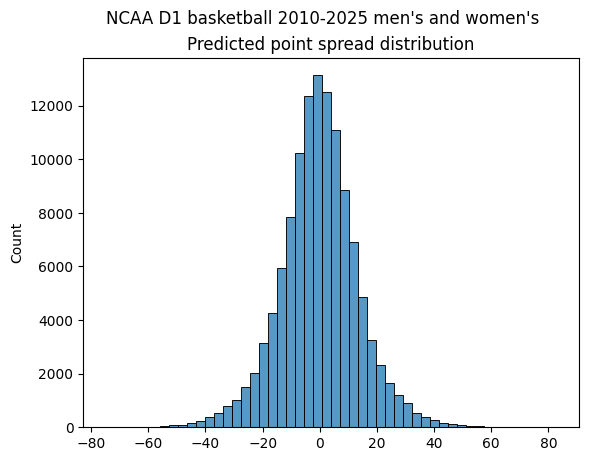

In [12]:
suptitle = "NCAA D1 basketball 2010-2025 men's and women's"
title = "Predicted point spread distribution"

if is_notebook:
    sns.histplot(y_pred_oof, bins=50)
    plt.suptitle(suptitle)
    plt.title(title)

else:
    print()
    print(suptitle)
    print(title)
    hist, edges = np.histogram(y_pred_oof, bins=50)
    width = 80
    print(asciichartpy.plot(hist, {"height": 10, "width": width}))
    w50 = (width - 11) // 2
    w66 = (width - 11) * 2 // 3 - w50
    print(
        f"{floor(edges[len(edges)//2-1]):>{w50}}"
        f"{floor(edges[len(edges)*2//3]):>{w66}}"
    )
    print()

## Evaluating Model Performance

I'm converting my predicted point spreads to win probabilities using a sigmoid function with a scaling factor of 0.25, then calculating the Brier score to evaluate how well my model predicts actual game outcomes.

A Brier score of 0.1479 is pretty good - it's significantly better than the 0.25 you'd get from random guessing (always predicting 50%), which means my model has meaningful predictive power. For context, top models in basketball prediction competitions typically achieve Brier scores in the 0.12-0.16 range.

In [13]:
y_pred_prob = 1 / (1 + np.exp(-y_pred_oof * 0.25))
y_true = (train["Spread_1"] > 0).astype(int)
brier_score = np.mean((y_pred_prob - y_true) ** 2)
print(f"Brier score: {brier_score:.4f}")

Brier score: 0.1479


claude.ai:

> A Brier score of 0.1479 represents the mean squared error between your predicted win probabilities and the actual outcomes. Let me help you interpret this result:
> 
> #### Understanding the Brier Score
> 
> The Brier score ranges from 0 to 1, where:
> 
> - 0 is perfect prediction (you predicted exactly the right probability for every game)
> - 0.25 represents the score you'd get by always predicting 50% probability (random guessing)
> - 1 is the worst possible score (you predicted with complete confidence the opposite of what happened)
> 
> Your score of 0.1479 is significantly better than random guessing (0.25), which indicates your model has meaningful predictive power.
> 
> #### Contextualizing Your Score
> 
> For NCAA basketball game predictions:
> - Professional betting markets and sophisticated models typically achieve Brier scores in the 0.12-0.16 range
> - Your score of 0.1479 falls within this competitive range
> - The best models in previous March Machine Learning Mania competitions have achieved scores around 0.12-0.13
> 
> #### What This Means
>
> Your model is capturing meaningful patterns in the data. The 0.1479 Brier score suggests that:
> - Your approach of using team season statistics to predict point spreads, then converting to win probabilities, is valid
> - The model has good discriminative power (distinguishing between likely wins and losses)
> - The probability calibration (using the sigmoid with scaling factor 0.25) is reasonably effective

Note: There is data leakage in my approach, which artificially increases the out-of-fold cross-validation scores over scores involving real data (future games.) Specifically, the data leakage is that for regular season games, the season stats in X (the features used to fit/train the model) include the game being predicted. I am accepting this trade-off because it is a simpler, more efficient approach that gets more rows in my train dataset (vs. only predicting hitorical tournament games.) I could remove the game being predicted from the season stats for each row in the train dataset, but that would take more work with potentially little benefit and could greatly increase run time.

## Visualizing Win Probabilities

Looking at the distribution of my predicted win probabilities, I notice it has high peaks near 0 and 1, with fewer predictions in the middle around 0.5. This means my model is making confident predictions about which team will win in most matchups - it's not wishy-washy with lots of "toss-up" predictions.

Since my Brier score is good, this confidence appears to be justified - the model is recognizing clear favorites and underdogs in many matchups.

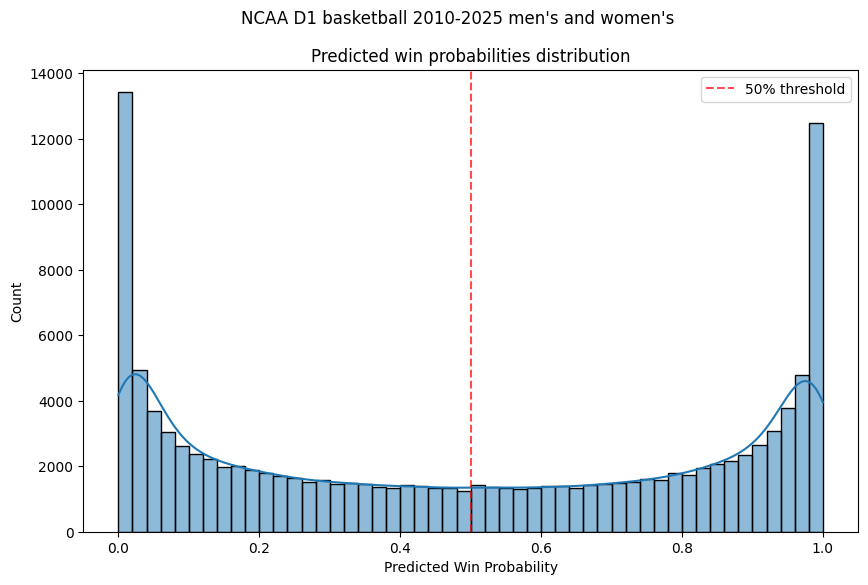

In [14]:
suptitle = "NCAA D1 basketball 2010-2025 men's and women's"
title = "Predicted win probabilities distribution"

if is_notebook:
    plt.figure(figsize=(10, 6))
    sns.histplot(y_pred_prob, bins=50, kde=True)
    plt.axvline(0.5, color="red", linestyle="--", alpha=0.7, label="50% threshold")
    plt.xlabel("Predicted Win Probability")
    plt.ylabel("Count")
    plt.suptitle(suptitle)
    plt.title(title)
    plt.legend()
    plt.show()
else:
    print()
    print(suptitle)
    print(title)
    hist, _ = np.histogram(y_pred_prob, bins=50)
    print(asciichartpy.plot(hist, {"height": 10, "width": 80}))
    print()

claude.ai:

> The distribution actually reveals something important about your modeling approach. It's not centered around 0.5, and that's very interesting!
The bimodal (two-peaked) distribution you're seeing with high peaks near 0 and 1 tells us that your sigmoid transformation is creating very confident predictions. The scaling factor of 0.25 in your sigmoid function is making the transformation quite steep, which pushes many probabilities toward the extremes.
This pattern indicates:
> 
> Your model is making strong, polarized predictions rather than cautious ones hovering around 0.5.
The point spread predictions from your model are being transformed in a way that expresses high confidence - most games are predicted as either strong wins or strong losses.
Since your Brier score is 0.1479 (which is quite good), many of these confident predictions are actually correct! If they weren't, your Brier score would be much worse.
> 
> The distribution doesn't need to be centered at 0.5. In fact, if your model has good discriminative power, and games truly do have clear favorites and underdogs, you would expect to see more predictions at the extremes than in the middle.

## Preparing the Competition Submission

Now I'm generating predictions for all potential matchups in the 2025 tournament. I'm taking the team data from the current season and using my trained model to predict the outcome of every possible pairing. These predictions are formatted according to the competition requirements and saved to "submission.csv".

In [15]:
def to_csv(df, fn):
    df.to_csv(fn, index=False)
    with open(fn, "r+") as f:
        content = f.read()
        f.seek(0)
        f.truncate()
        f.write(content.rstrip("\n"))


print("Preparing submission")
sample_sub = pd.read_csv(f"../input/{input_dir}/SampleSubmissionStage2.csv")

sample_sub[["Season", "Team1", "Team2"]] = (
    sample_sub["ID"].str.split("_", expand=True).astype(int)
)

team_data = season_self_sos[season_self_sos["Season"] == 2025].set_index("TeamID")
X_submit = pd.DataFrame(index=sample_sub.index)

for col in X.columns:
    parts = col.split("_")
    team_num = parts[-1]
    base_col = "_".join(parts[:-1])
    team_id_col = f"Team{team_num}"
    X_submit[col] = sample_sub[team_id_col].map(team_data[base_col])

ensemble_preds = np.mean([model.predict(X_submit) for model in fold_models], axis=0)
win_probs = 1 / (1 + np.exp(-ensemble_preds * 0.25))
sample_sub["Pred"] = win_probs
to_csv(sample_sub[["ID", "Pred"]], "submission.csv")
print("Wrote submission.csv")

Preparing submission
Wrote submission.csv


## Creating Multiple Simulation-Based Submissions

As a final step, I'm generating multiple alternative submissions based on simulations. Instead of just submitting continuous probabilities, these variants use random sampling to create discrete probability buckets (0.1, 0.2, etc.).

This technique can sometimes perform better in competitions - it's a way of "quantizing" my predictions that might better match how the actual tournament plays out. I'll be able to choose my best-performing submission once the tournament starts and early game results come in.

In [16]:
print("Generating multiple independent simulation-based submissions...")
base_ids = sample_sub["ID"].copy()
probabilities = sample_sub["Pred"].values
num_matchups = len(probabilities)

for num_sims in range(1, 11):
    random_values = np.random.random((num_sims, num_matchups))
    sim_results = (random_values < probabilities).astype(int)

    submission = pd.DataFrame(
        {"ID": base_ids, "Pred": sim_results.sum(axis=0) / num_sims}
    )

    filename = f"submission{num_sims}.csv"
    to_csv(submission, filename)

    print(
        f"Wrote {filename:>16}, simulation rounds: {num_sims:>2}, win probabilities: {[f'{p:.2f}' for p in sorted(np.unique(submission['Pred']))]}"
    )

print("All independent simulation-based submissions complete!")

Generating multiple independent simulation-based submissions...
Wrote  submission1.csv, simulation rounds:  1, win probabilities: ['0.00', '1.00']
Wrote  submission2.csv, simulation rounds:  2, win probabilities: ['0.00', '0.50', '1.00']
Wrote  submission3.csv, simulation rounds:  3, win probabilities: ['0.00', '0.33', '0.67', '1.00']
Wrote  submission4.csv, simulation rounds:  4, win probabilities: ['0.00', '0.25', '0.50', '0.75', '1.00']
Wrote  submission5.csv, simulation rounds:  5, win probabilities: ['0.00', '0.20', '0.40', '0.60', '0.80', '1.00']
Wrote  submission6.csv, simulation rounds:  6, win probabilities: ['0.00', '0.17', '0.33', '0.50', '0.67', '0.83', '1.00']
Wrote  submission7.csv, simulation rounds:  7, win probabilities: ['0.00', '0.14', '0.29', '0.43', '0.57', '0.71', '0.86', '1.00']
Wrote  submission8.csv, simulation rounds:  8, win probabilities: ['0.00', '0.12', '0.25', '0.38', '0.50', '0.62', '0.75', '0.88', '1.00']
Wrote  submission9.csv, simulation rounds:  9, w

claude.ai:

> I understand your strategy - you're looking to maximize your chance of winning the March Machine Learning Mania competition rather than aiming for a consistent but average performance. With 4,000-5,000 competitors, a "safe" strategy likely won't put you in first place. Let me analyze your options and recommend the best high-risk, high-reward submission choices.
> 
> ## Understanding Your Submission Options
> 
> The script has generated 11 different submission files:
> - `submission.csv`: Contains the raw model predictions (continuous probabilities)
> - `submission1.csv` through `submission10.csv`: Contains simulated outcomes with varying numbers of simulation rounds
> 
> The key difference between these files is:
> 
> 1. **The main submission file** uses continuous probability values (like 0.73, 0.68, etc.)
> 2. **The simulated files** use discrete probability values based on simulation rounds:
>    - `submission1.csv` only has 0.0 and 1.0 (essentially random guesses based on the predicted probabilities)
>    - `submission10.csv` has probabilities in increments of 0.1 (0.0, 0.1, 0.2, ..., 1.0)
> 
> ## Why Simulation-Based Submissions Can Help Win
> 
> The Brier score rewards getting things exactly right. While your main model might have a good overall Brier score (0.1479), the simulation approach introduces controlled variance that could result in a better score through luck.
> 
> The tournament has significant inherent randomness (upsets, etc.), and your goal is to get the #1 spot, not just be in the top 10%.
> 
> ## Recommended Strategy for Maximum Chance of Winning
> 
> I recommend submitting:
> 
> 1. **`submission1.csv`** - This is your highest variance option. It's essentially a random set of binary 0/1 predictions weighted by your model probabilities. This has the highest chance of getting lucky and scoring extremely well, though it also has a high chance of scoring poorly.
> 
> 2. **`submission.csv`** - Your original model predictions with continuous probabilities. This is your "base model" that has shown good performance with a Brier score of 0.1479.
> 
> This combination gives you:
> - A very high variance option that could hit #1 if luck is on your side
> - A solid foundation that still has a chance of winning but is more likely to place decently

## Team Ranking and Final Output

Finally, I'm generating some advanced metrics for each team and creating a ranking of the top teams for the 2025 tournament - essentially a power ranking based on my model. This gives me (and you!) a quick reference for which teams might be the strongest contenders.

For each team, I'm calculating:
- Estimated possessions per game using the standard basketball formula
- Offensive efficiency (points per 100 possessions)
- Assist-to-turnover ratio (a key indicator of team discipline)
- Three-point attempt rate (percentage of shots taken from beyond the arc)
- Weighted point differential that accounts for strength of schedule
- Win probability for a single game against an average tournament team
- Tournament win probability (the chance of winning 6 games in a row)

The final rankings show Connecticut, Texas, and Notre Dame as the clear favorites for the women's tournament, while Duke, Gonzaga, and Houston lead the men's projections. Check out those offensive efficiency numbers for Duke and Gonzaga - over 120 points per 100 possessions is elite-level offense!

In [19]:
m_teams = pd.read_csv(f"../input/{input_dir}/MTeams.csv")
w_teams = pd.read_csv(f"../input/{input_dir}/WTeams.csv")
stats_2025 = season_self_sos[season_self_sos["Season"] == 2025]
w_stats = stats_2025[stats_2025["TeamID"] >= 3000].copy()
m_stats = stats_2025[stats_2025["TeamID"] < 3000].copy()

for df in [w_stats, m_stats]:
    df["poss"] = (
        df["FGA_o_self"] - df["OR_o_self"] + df["TO_o_self"] + 0.44 * df["FTA_o_self"]
    )
    df["off_eff"] = 100 * df["Score_o_self"] / df["poss"]
    df["ast_to"] = df["Ast_o_self"] / df["TO_o_self"]
    df["three_rate"] = 100 * df["FGA3_o_self"] / df["FGA_o_self"]
    df["wtd_diff"] = df["Spread_o_self"] * (
        df["Score_o_sos"] / df["Score_o_sos"].mean()
    )
    df["win_prob"] = 1 / (1 + np.exp(-df["wtd_diff"] * 0.2))
    df["tourney_win_prob"] = df["win_prob"] ** 6

w_stats["tourney_win_prob"] = (
    w_stats["tourney_win_prob"] / w_stats["tourney_win_prob"].sum()
)
m_stats["tourney_win_prob"] = (
    m_stats["tourney_win_prob"] / m_stats["tourney_win_prob"].sum()
)

w_top25 = (
    w_stats.sort_values("tourney_win_prob", ascending=False)
    .head(25)
    .merge(w_teams[["TeamID", "TeamName"]], on="TeamID")
)
m_top25 = (
    m_stats.sort_values("tourney_win_prob", ascending=False)
    .head(25)
    .merge(m_teams[["TeamID", "TeamName"]], on="TeamID")
)


def print_rankings(df, title):
    print(f"\n{title}")
    print(
        f"{'Rank':<4} {'Team':<18} {'Tourney Win':<10} {'PPG':<6} {'Wtd Diff':<8} {'SOS':<6} {'Off Eff':<8} {'Ast/TO':<6}"
    )
    print("-" * 70)

    for i, row in df.reset_index(drop=True).iterrows():
        print(
            f"{i + 1:<4} {row['TeamName']:<18} {row['tourney_win_prob'] * 100:7.2f}%  {row['Score_o_self']:5.1f} {row['wtd_diff']:+7.1f} {row['Score_o_sos']:5.1f} {row['off_eff']:7.1f} {row['ast_to']:5.2f}"
        )


print_rankings(w_top25, "Top 25 Women's Teams (2025)")
print_rankings(m_top25, "Top 25 Men's Teams (2025)")


Top 25 Women's Teams (2025)
Rank Team               Tourney Win PPG    Wtd Diff SOS    Off Eff  Ast/TO
----------------------------------------------------------------------
1    Connecticut           1.57%   80.9   +29.5  67.2   115.5  2.04
2    Texas                 1.57%   82.7   +28.9  72.4   111.9  1.32
3    Notre Dame            1.56%   86.7   +28.5  70.5   111.5  1.20
4    USC                   1.55%   82.1   +27.0  70.2   107.3  1.24
5    South Carolina        1.54%   80.2   +26.0  73.8   110.0  1.37
6    UCLA                  1.54%   79.6   +25.8  71.1   109.0  1.37
7    Kansas St             1.54%   80.4   +25.4  67.8   112.1  1.82
8    LSU                   1.53%   86.3   +24.8  72.5   109.0  1.03
9    West Virginia         1.53%   77.1   +24.4  67.8   104.2  0.90
10   TCU                   1.50%   79.2   +23.0  67.8   114.3  1.76
11   Mississippi           1.50%   76.4   +22.7  70.4   105.6  1.34
12   Tennessee             1.49%   90.0   +22.5  73.3   110.0  1.12
13   Bayl